In [1]:
import pickle
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold


def get_accuracy(padded_sv1_vals, padded_sv2_vals):
    AvBx = np.concatenate((padded_sv1_vals, padded_sv2_vals), axis=0)
    AvBy = np.concatenate(
        (np.ones(len(padded_sv1_vals)), np.zeros(len(padded_sv2_vals))), axis=0
    )

    # Initialize the logistic regression model
    AvB = LogisticRegression()

    # Initialize KFold with 10 splits
    kf = KFold(n_splits=10, shuffle=True, random_state=1)

    # Lists to store accuracy scores for each fold
    accuracy_scores = []

    # Perform 10-fold cross-validation
    for train_index, test_index in kf.split(AvBx):
        X_train, X_test = AvBx[train_index], AvBx[test_index]
        y_train, y_test = AvBy[train_index], AvBy[test_index]

        # Fit the model on the training data
        AvB.fit(X_train, y_train)

        # Calculate accuracy on the test data
        accuracy = AvB.score(X_test, y_test)
        accuracy_scores.append(accuracy)

    # Calculate the average accuracy across all folds
    average_accuracy = np.mean(accuracy_scores)

    print("Average accuracy:", average_accuracy)

    return average_accuracy


def get_exp_consistency(accs):
    return 1 - np.sum([2 * abs(acc - 0.5) for acc in accs]) / len(accs)


## Load corrected

In [3]:
sv1 = pickle.load(
    open(
        "/home/james/CodingProjects/TextNTabularExplanations/models/shap_vals_drob_sf1_1/kick/shap_vals_all_text.pkl",
        "rb",
    )
)
sv2 = pickle.load(
    open(
        "/home/james/CodingProjects/TextNTabularExplanations/models/shap_vals_drob_sf1_2/kick/shap_vals_all_text.pkl",
        "rb",
    )
)
sv3 = pickle.load(
    open(
        "/home/james/CodingProjects/TextNTabularExplanations/models/shap_vals_drob_sf1_3/kick/shap_vals_all_text.pkl",
        "rb",
    )
)
sv4 = pickle.load(
    open(
        "/home/james/CodingProjects/TextNTabularExplanations/models/shap_vals_drob_sf1_4/kick/shap_vals_all_text.pkl",
        "rb",
    )
)


/home/james/CodingProjects/TextNTabularExplanations/env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
max_len = 0
for i in range(len(sv1.values)):
    if len(sv1.values[i]) > max_len:
        max_len = len(sv1.values[i])
print(max_len)

# pad sv1.values with 0s to max_len so new shape is (max_len, 2)
sv1_vals = [v[:, 1] for v in list(sv1.values)]
padded_sv1_vals = []
for i in range(len(sv1_vals)):
    if len(sv1_vals[i]) < max_len:
        padded_sv1_vals.append(
            np.pad(sv1_vals[i], (0, max_len - len(sv1_vals[i])), "constant")
        )
    else:
        padded_sv1_vals.append(sv1_vals[i])
padded_sv1_vals = np.stack(padded_sv1_vals)

sv2_vals = [v[:, 1] for v in list(sv2.values)]
padded_sv2_vals = []
for i in range(len(sv2_vals)):
    if len(sv2_vals[i]) < max_len:
        padded_sv2_vals.append(
            np.pad(sv2_vals[i], (0, max_len - len(sv2_vals[i])), "constant")
        )
    else:
        padded_sv2_vals.append(sv2_vals[i])
padded_sv2_vals = np.stack(padded_sv2_vals)

sv3_vals = [v[:, 1] for v in list(sv3.values)]
padded_sv3_vals = []
for i in range(len(sv3_vals)):
    if len(sv3_vals[i]) < max_len:
        padded_sv3_vals.append(
            np.pad(sv3_vals[i], (0, max_len - len(sv3_vals[i])), "constant")
        )
    else:
        padded_sv3_vals.append(sv3_vals[i])
padded_sv3_vals = np.stack(padded_sv3_vals)

sv4_vals = [v[:, 1] for v in list(sv4.values)]
padded_sv4_vals = []
for i in range(len(sv4_vals)):
    if len(sv4_vals[i]) < max_len:
        padded_sv4_vals.append(
            np.pad(sv4_vals[i], (0, max_len - len(sv4_vals[i])), "constant")
        )
    else:
        padded_sv4_vals.append(sv4_vals[i])
padded_sv4_vals = np.stack(padded_sv4_vals)


582


In [5]:
pairs = [
    (padded_sv1_vals, padded_sv2_vals),
    (padded_sv1_vals, padded_sv3_vals),
    (padded_sv1_vals, padded_sv4_vals),
    (padded_sv2_vals, padded_sv3_vals),
    (padded_sv2_vals, padded_sv4_vals),
    (padded_sv3_vals, padded_sv4_vals),
]
accs = [get_accuracy(p[0], p[1]) for p in pairs]
print(get_exp_consistency(accs))


Average accuracy: 0.5565
Average accuracy: 0.5239999999999999
Average accuracy: 0.5915
Average accuracy: 0.5539999999999999
Average accuracy: 0.635
Average accuracy: 0.5795
0.8531666666666667


## Load baseline

In [6]:
sv1_baseline = pickle.load(
    open(
        "/home/james/CodingProjects/TextNTabularExplanations/models/shap_vals_drob_sf1_1/kick/shap_vals_all_text_baseline.pkl",
        "rb",
    )
)
sv2_baseline = pickle.load(
    open(
        "/home/james/CodingProjects/TextNTabularExplanations/models/shap_vals_drob_sf1_2/kick/shap_vals_all_text_baseline.pkl",
        "rb",
    )
)
sv3_baseline = pickle.load(
    open(
        "/home/james/CodingProjects/TextNTabularExplanations/models/shap_vals_drob_sf1_3/kick/shap_vals_all_text_baseline.pkl",
        "rb",
    )
)
sv4_baseline = pickle.load(
    open(
        "/home/james/CodingProjects/TextNTabularExplanations/models/shap_vals_drob_sf1_4/kick/shap_vals_all_text_baseline.pkl",
        "rb",
    )
)


In [7]:
lens = [
    (len(sv1_baseline.values[i]), len(sv1.values[i])) for i in range(len(sv1_baseline))
]
print(max([i[1] for i in lens]))
print(max([i[0] for i in lens]))


582
621


In [8]:
max_len = 0
for i in range(len(sv1_baseline.values)):
    if len(sv1_baseline.values[i]) > max_len:
        max_len = len(sv1_baseline.values[i])
print(max_len)

# pad sv1_baseline.values with 0s to max_len so new shape is (max_len, 2)
sv1_baseline_vals = [v[:, 1] for v in list(sv1_baseline.values)]
padded_sv1_baseline_vals = []
for i in range(len(sv1_baseline_vals)):
    if len(sv1_baseline_vals[i]) < max_len:
        padded_sv1_baseline_vals.append(
            np.pad(
                sv1_baseline_vals[i],
                (0, max_len - len(sv1_baseline_vals[i])),
                "constant",
            )
        )
    else:
        padded_sv1_baseline_vals.append(sv1_baseline_vals[i])
padded_sv1_baseline_vals = np.stack(padded_sv1_baseline_vals)

sv2_baseline_vals = [v[:, 1] for v in list(sv2_baseline.values)]
padded_sv2_baseline_vals = []
for i in range(len(sv2_baseline_vals)):
    if len(sv2_baseline_vals[i]) < max_len:
        padded_sv2_baseline_vals.append(
            np.pad(
                sv2_baseline_vals[i],
                (0, max_len - len(sv2_baseline_vals[i])),
                "constant",
            )
        )
    else:
        padded_sv2_baseline_vals.append(sv2_baseline_vals[i])
padded_sv2_baseline_vals = np.stack(padded_sv2_baseline_vals)

sv3_baseline_vals = [v[:, 1] for v in list(sv3_baseline.values)]
padded_sv3_baseline_vals = []
for i in range(len(sv3_baseline_vals)):
    if len(sv3_baseline_vals[i]) < max_len:
        padded_sv3_baseline_vals.append(
            np.pad(
                sv3_baseline_vals[i],
                (0, max_len - len(sv3_baseline_vals[i])),
                "constant",
            )
        )
    else:
        padded_sv3_baseline_vals.append(sv3_baseline_vals[i])
padded_sv3_baseline_vals = np.stack(padded_sv3_baseline_vals)

sv4_baseline_vals = [v[:, 1] for v in list(sv4_baseline.values)]
padded_sv4_baseline_vals = []
for i in range(len(sv4_baseline_vals)):
    if len(sv4_baseline_vals[i]) < max_len:
        padded_sv4_baseline_vals.append(
            np.pad(
                sv4_baseline_vals[i],
                (0, max_len - len(sv4_baseline_vals[i])),
                "constant",
            )
        )
    else:
        padded_sv4_baseline_vals.append(sv4_baseline_vals[i])
padded_sv4_baseline_vals = np.stack(padded_sv4_baseline_vals)


621


In [9]:
pairs = [
    (padded_sv1_baseline_vals, padded_sv2_baseline_vals),
    (padded_sv1_baseline_vals, padded_sv3_baseline_vals),
    (padded_sv1_baseline_vals, padded_sv4_baseline_vals),
    (padded_sv2_baseline_vals, padded_sv3_baseline_vals),
    (padded_sv2_baseline_vals, padded_sv4_baseline_vals),
    (padded_sv3_baseline_vals, padded_sv4_baseline_vals),
]
accs = [get_accuracy(p[0], p[1]) for p in pairs]
print(get_exp_consistency(accs))


Average accuracy: 0.5685
Average accuracy: 0.6795
Average accuracy: 0.7150000000000001
Average accuracy: 0.665
Average accuracy: 0.6885
Average accuracy: 0.6475
0.6786666666666666


## JSD

In [13]:
from sklearn.neighbors import KernelDensity
import numpy as np

X = padded_sv1_baseline_vals
kde = (
    KernelDensity(kernel="gaussian")
    .fit(padded_sv1_baseline_vals)
    .score_samples(padded_sv1_baseline_vals)
)
kde.score_samples(X)

array([-570.67409531, -570.67488677, -570.67500148, -570.68242455,
       -570.66857496, -570.67313158, -570.66970704, -570.67385718,
       -570.67148537, -570.66782244, -570.67022827, -570.66818754,
       -570.66860249, -570.67105623, -570.66973864, -570.67217233,
       -570.6685751 , -570.67097368, -570.67052677, -570.67266202,
       -570.67922602, -570.67430548, -570.66870807, -570.66812483,
       -570.66929705, -570.6680218 , -570.67249949, -570.67387722,
       -570.67088295, -570.67078594, -570.67532798, -570.67228728,
       -570.68240685, -570.67425036, -570.67746368, -570.67240479,
       -570.66793594, -570.67034567, -570.67253048, -570.6690912 ,
       -570.66875698, -570.67560836, -570.68805166, -570.66918913,
       -570.68016214, -570.66902537, -570.67214275, -570.66790234,
       -570.6709033 , -570.6685027 , -570.67547151, -570.67297759,
       -570.67676457, -570.67492385, -570.67766011, -570.66908472,
       -570.66786092, -570.67109143, -570.669322  , -570.67096

In [19]:
from scipy.spatial import distance

distance.jensenshannon(
    KernelDensity(kernel="gaussian").fit(padded_sv1_baseline_vals),
    KernelDensity(kernel="gaussian").fit(padded_sv2_baseline_vals),
)

TypeError: unsupported operand type(s) for /: 'KernelDensity' and 'KernelDensity'

In [26]:
sum(
    KernelDensity(kernel="gaussian")
    .fit(padded_sv2_baseline_vals)
    .score_samples(padded_sv1_baseline_vals)
)


def calc_jsd(p, q):
    p_kde = KernelDensity(kernel="gaussian").fit(p)
    q_kde = KernelDensity(kernel="gaussian").fit(q)
    p_samples = p_kde.sample(1000)
    q_samples = q_kde.sample(1000)
    p_log_dens = np.exp(p_kde.score_samples(p_samples))
    q_log_dens = np.exp(q_kde.score_samples(q_samples))
    # m = (p_log_dens + q_log_dens) / 2
    return distance.jensenshannon(p_log_dens, q_log_dens)


calc_jsd(padded_sv2_baseline_vals, padded_sv1_baseline_vals)

invalid value encountered in divide
invalid value encountered in divide


nan

In [21]:
a2 = (
    KernelDensity(kernel="gaussian")
    .fit(padded_sv2_baseline_vals)
    .score_samples(padded_sv2_baseline_vals)
)
a1 = (
    KernelDensity(kernel="gaussian")
    .fit(padded_sv1_baseline_vals)
    .score_samples(padded_sv1_baseline_vals)
)
distance.jensenshannon(a1 / sum(a1), a2 / sum(a2))

3.7477592848684845e-06

In [29]:
padded_sv2_baseline_vals.shape


(1000, 621)

AttributeError: Rectangle.set() got an unexpected keyword argument 'normed'

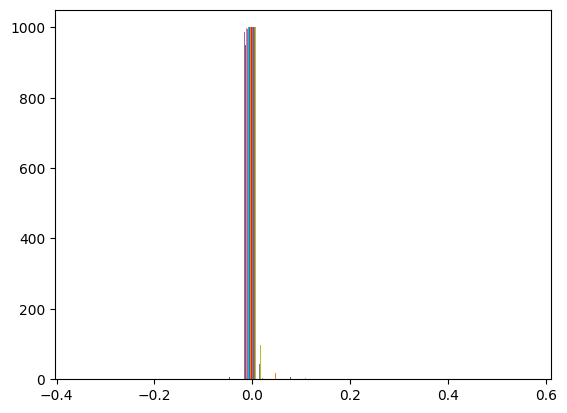

In [28]:
import matplotlib.pyplot as plt


plt.hist(padded_sv2_baseline_vals, bins=30, normed=True)

In [30]:
KernelDensity(kernel="gaussian").fit(padded_sv2_baseline_vals)


KernelDensity()